## CLUSTERING - Credit Card User Segmentation

Nama : Rizka Nur Pratama

### IMPORT PACKAGES

In [1]:
# Connect to gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# Define path
path = '/content/gdrive/MyDrive/Summer/Meet 17/5. Clustering - Credit Card User Segmentation/'

os.listdir(path)


['credit_card_user_segmentation.csv']

### READ DATASET

In [4]:
# Load data
df = pd.read_csv(os.path.join(path, 'credit_card_user_segmentation.csv'))
df.head()

,Cust_ID,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### PROBLEM STATEMENT

Melakukan segmentasi pelanggan dengan data yang ada, sehingga perusahaan dapat memberikan treatment kepada pelanggan sesuai dengan segmentasinya.

### EDA

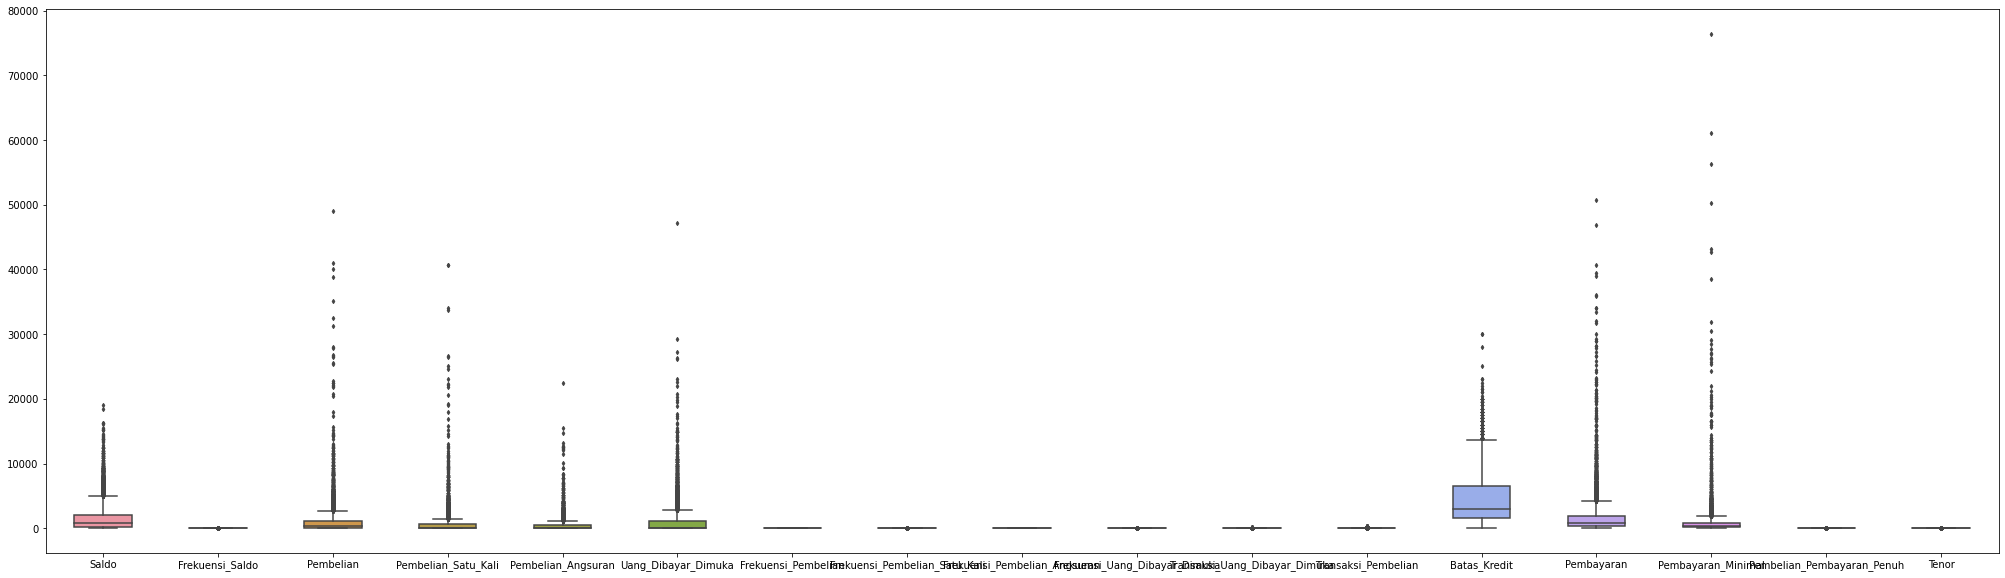

In [5]:
# Visualisasi Boxplot
import seaborn as sns
fig, ax = plt.subplots(figsize=(35,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [8]:
# Statistika Deskriptif
df.describe()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


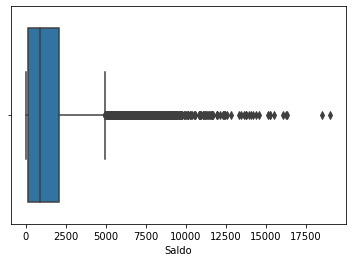

In [50]:
# Check saldo
sns.boxplot(df["Saldo"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


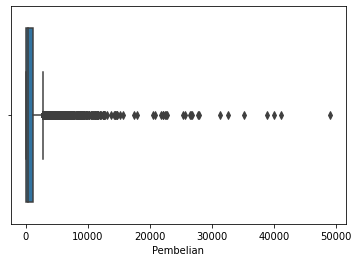

In [10]:
# Check Pembelian
sns.boxplot(df["Pembelian"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


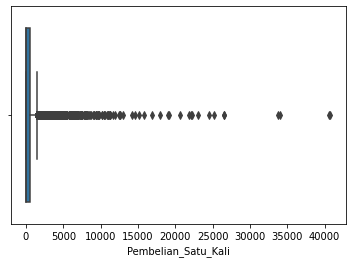

In [11]:
# Check Pembelian_Satu_Kali
sns.boxplot(df["Pembelian_Satu_Kali"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


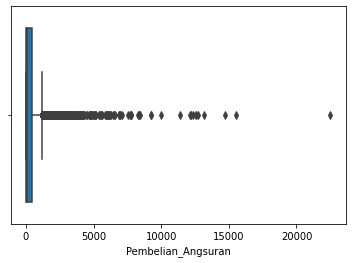

In [12]:
# Check pembelian angsuran
sns.boxplot(df["Pembelian_Angsuran"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


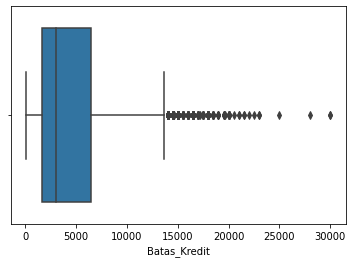

In [13]:
# Check Batas_Kredit
sns.boxplot(df["Batas_Kredit"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


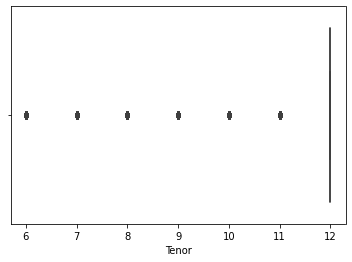

In [14]:
# Check Tenor
sns.boxplot(df["Tenor"])

### DATA-PREPROCESSING

#### Missing values

In [15]:
# Mengetahui tipe data dari masing-masing variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cust_ID                        8950 non-null   object 
 1   Saldo                          8950 non-null   float64
 2   Frekuensi_Saldo                8950 non-null   float64
 3   Pembelian                      8950 non-null   float64
 4   Pembelian_Satu_Kali            8950 non-null   float64
 5   Pembelian_Angsuran             8950 non-null   float64
 6   Uang_Dibayar_Dimuka            8950 non-null   float64
 7   Frekuensi_Pembelian            8950 non-null   float64
 8   Frekuensi_Pembelian_Satu_Kali  8950 non-null   float64
 9   Frekuensi_Pembelian_Angsuran   8950 non-null   float64
 10  Frekuensi_Uang_Dibayar_Dimuka  8950 non-null   float64
 11  Transaksi_Uang_Dibayar_Dimuka  8950 non-null   int64  
 12  Transaksi_Pembelian            8950 non-null   i

In [16]:
# Check missing values
jumlah_missing = df.isnull().sum()
jumlah_missing

Cust_ID                            0
Saldo                              0
Frekuensi_Saldo                    0
Pembelian                          0
Pembelian_Satu_Kali                0
Pembelian_Angsuran                 0
Uang_Dibayar_Dimuka                0
Frekuensi_Pembelian                0
Frekuensi_Pembelian_Satu_Kali      0
Frekuensi_Pembelian_Angsuran       0
Frekuensi_Uang_Dibayar_Dimuka      0
Transaksi_Uang_Dibayar_Dimuka      0
Transaksi_Pembelian                0
Batas_Kredit                       1
Pembayaran                         0
Pembayaran_Minimal               313
Pembelian_Pembayaran_Penuh         0
Tenor                              0
dtype: int64

In [17]:
# Menghitung rasio jumlah missing values
rasio = jumlah_missing.div(len(df))
rasio

Cust_ID                          0.000000
Saldo                            0.000000
Frekuensi_Saldo                  0.000000
Pembelian                        0.000000
Pembelian_Satu_Kali              0.000000
Pembelian_Angsuran               0.000000
Uang_Dibayar_Dimuka              0.000000
Frekuensi_Pembelian              0.000000
Frekuensi_Pembelian_Satu_Kali    0.000000
Frekuensi_Pembelian_Angsuran     0.000000
Frekuensi_Uang_Dibayar_Dimuka    0.000000
Transaksi_Uang_Dibayar_Dimuka    0.000000
Transaksi_Pembelian              0.000000
Batas_Kredit                     0.000112
Pembayaran                       0.000000
Pembayaran_Minimal               0.034972
Pembelian_Pembayaran_Penuh       0.000000
Tenor                            0.000000
dtype: float64

Dikarenakan rasio dari variable yang memiliki missing values dibawah 60%, maka tidak disarankan untuk melakukan drop data. Untuk variabel 'Batas_Kredit' dan 'Pembayaran_Minimal' memiliki tipe data float, maka dapat dilakukan pengisian missing values menggunakan mean.

In [18]:
# Mengubah NaNs kolom (missing value) dengan nilai Mean 
df['Batas_Kredit'].fillna(int(df['Batas_Kredit'].mean()), inplace=True)
df['Pembayaran_Minimal'].fillna(int(df['Pembayaran_Minimal'].mean()), inplace=True)

In [19]:
# Check missing values
df.isnull().sum()

Cust_ID                          0
Saldo                            0
Frekuensi_Saldo                  0
Pembelian                        0
Pembelian_Satu_Kali              0
Pembelian_Angsuran               0
Uang_Dibayar_Dimuka              0
Frekuensi_Pembelian              0
Frekuensi_Pembelian_Satu_Kali    0
Frekuensi_Pembelian_Angsuran     0
Frekuensi_Uang_Dibayar_Dimuka    0
Transaksi_Uang_Dibayar_Dimuka    0
Transaksi_Pembelian              0
Batas_Kredit                     0
Pembayaran                       0
Pembayaran_Minimal               0
Pembelian_Pembayaran_Penuh       0
Tenor                            0
dtype: int64

#### Duplicates data

In [20]:
# Check duplicates data
df[df.duplicated(keep=False)]

,Cust_ID,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor


Tidak terdapat data duplicate

### FEATURE ENGINEERING

#### Feature Selection

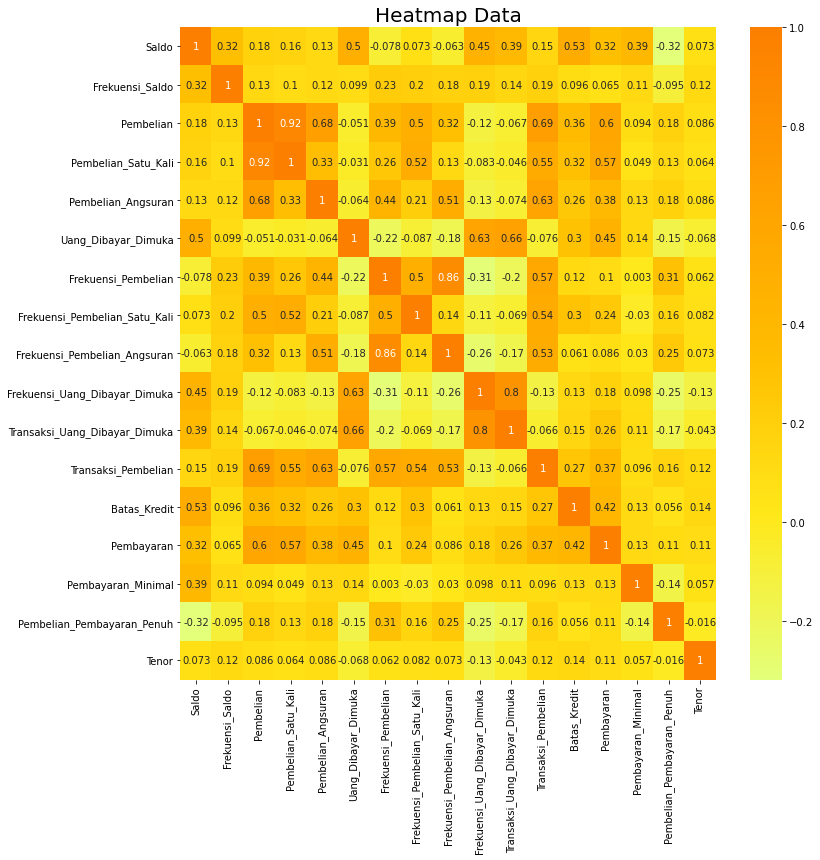

In [21]:
# Feature selection menggunakan Heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

#### Drop data

In [22]:
# Removing variabel
df = df.drop(['Cust_ID'], axis=1)

Kolom 'Cust_ID' memiliki tipe data object, sehingga dilakukan drop data.

#### Scalingn and nomralization

In [23]:
# Scaling data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df)

In [24]:
# Normalizing Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df)

#### Dimension Reduction Using PCA

Pengurangan dimensi data dapat dilakukan dengan:
1. Mengkombinasikan fitur (secara liniar maupun non-linear)
2. Memilih himpunan bagian dari fitur-fitur yang tersedia

Pendekatan klasik untuk menghitung transformasi linear yang optimal adalah PCA. 

Principal Component Analysis (PCA) adalah sebuah metode untuk untuk mengurangi jumlah dimensi. 

Tujuan PCA adalah mengurangi dimensi data dengan tetap mempertahankan sebanyak mungkin informasi dari dataset yang asli. 

In [25]:
# Dimension Reduction Using PCA
pca = PCA(n_components =2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['PCA 1','PCA 2'] 
X_principal.head()

,PCA 1,PCA 2
0,-0.489826,-0.679678
1,-0.518791,0.545011
2,0.330885,0.268977
3,-0.482374,-0.092116
4,-0.563289,-0.481914


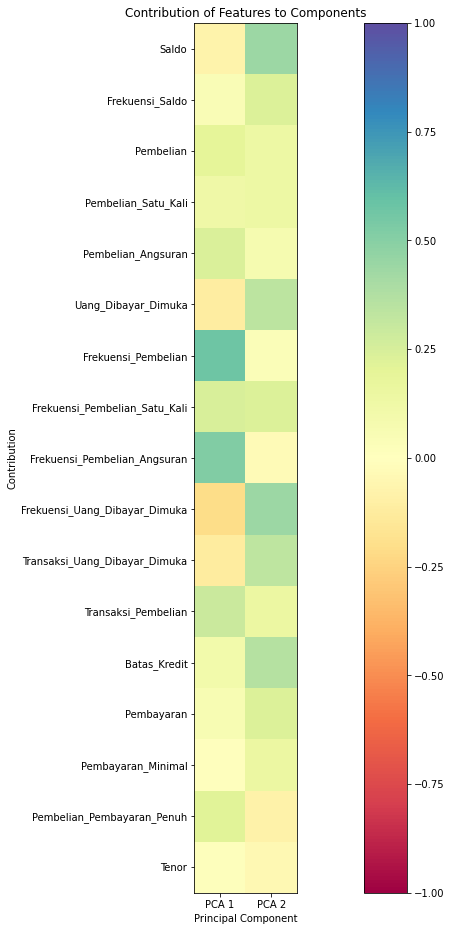

In [26]:
# Visualisasi data PCA
fig, ax = plt.subplots(figsize=(24, 16))
plt.imshow(pca.components_.T,
           cmap="Spectral",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(df.columns)), df.columns)
plt.xticks(range(len(X_principal.columns)), X_principal.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

### MODELING

Menentukan nilai optimal K (kelompok) dengan Metode Elbow merupakan suatu metode yang digunakan untuk menghasilkan informasi dalam menentukan jumlah cluster terbaik dengan cara melihat persentase hasil perbandingan antara jumlah cluster yang akan membentuk siku pada suatu titik.

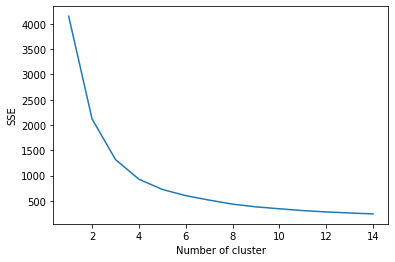

In [27]:
# Melakukan modeling data dengan Kmeans
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Berdasarkan metode elbow pada titik siku-siku diperoleh di k=3. Namun untuk memastikan, akan dievaluasi dengan menggunakan silhouette score.

### EVALUATION

Menggunakan silhouette score untuk evaluasi k-cluster

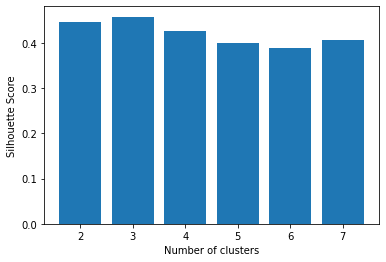

In [28]:
# Evaluasi k-cluster
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [30]:
silhouette_scores

[0.4474202656461859,
 0.45809276557794754,
 0.42633769717820763,
 0.4006320414088646,
 0.3895487775395231,
 0.407060066277954]

Berdasarkan evaluasi dengan silhouette scores, dapat disimpulkan bahwa asumsi yang didapatkan pada saat modeling data adalah benar yaitu k-cluster paling efektif adalah k=3.

In [31]:
# kmeans dengan k=3
kmean= KMeans(3)
kmean.fit(scaled_df)
labels=kmean.labels_

In [32]:
# Membuat dataframe baru berdasarkan clustering
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.000000,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


### EDA

Selanjutnya setelah menentukan clustering, akan dilakukan analisa pada masing-masing cluster. Bagaimana kondisi dan kebiasaan dari masing-masing cluster, untuk kemudian dilakukan rekomendasi berdasarkan cluster. 

Terdapat tiga cluster, yaitu:


1.   Cluster 0
2.   Cluster 1
3. Cluster 2



In [34]:
# Jumlah masing-masing cluster
clusters['cluster'].value_counts()

0    6119
2    1596
1    1235
Name: cluster, dtype: int64

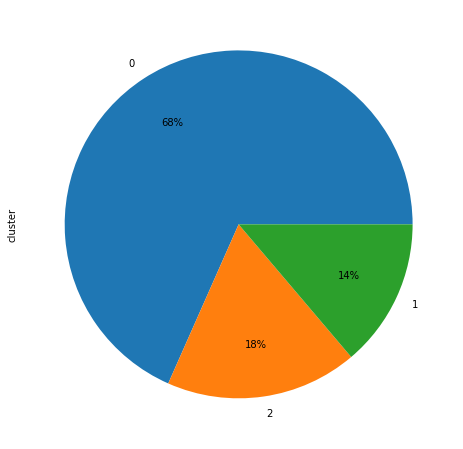

In [35]:
# Visualisasi data persentase masing-masing cluster
plt.figure(figsize=(8,8))
clusters.cluster.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)



1.   Cluster 0 -> 68% = 6119 user -> Large Group
2.   Cluster 1 -> 14% = 1235 user -> Small Group
3.   Cluster 2 -> 18% = 1596 user -> Small Group



Setelah mengetahu secara garis besar gambaran antar cluster, selanjutnya akan di explorasi kebiasaan antar cluster berdasarkan variabel-variabel yang ada.

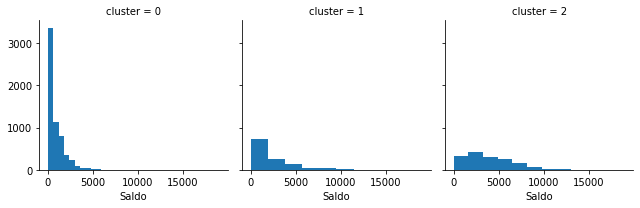

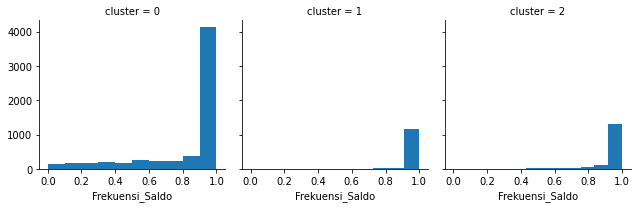

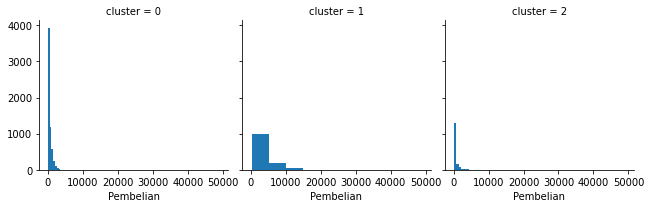

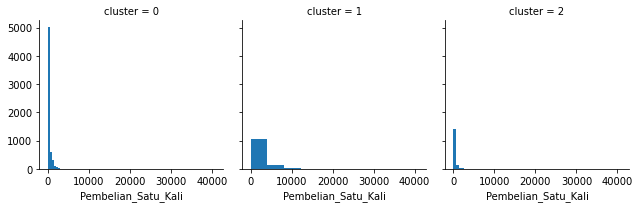

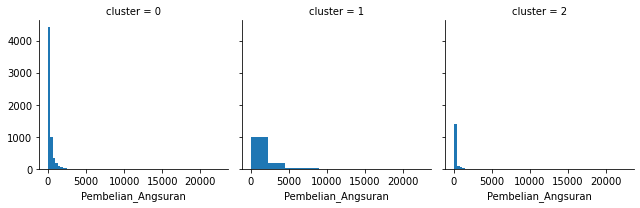

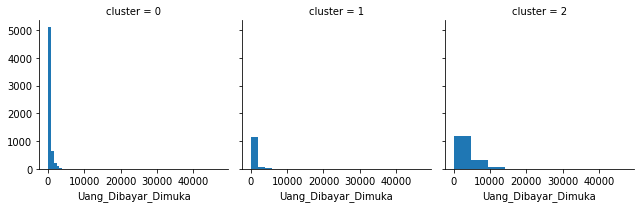

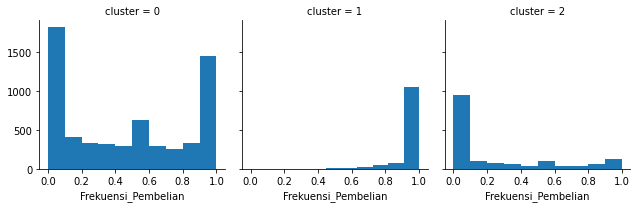

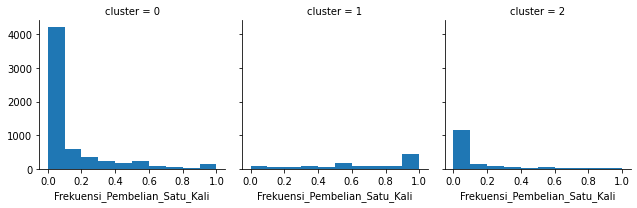

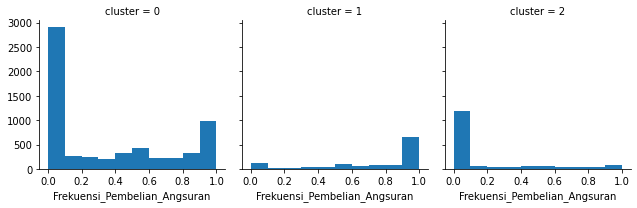

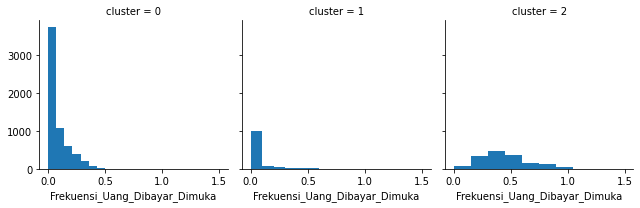

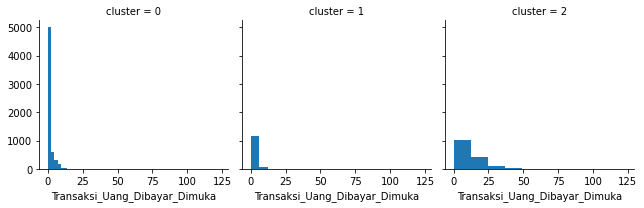

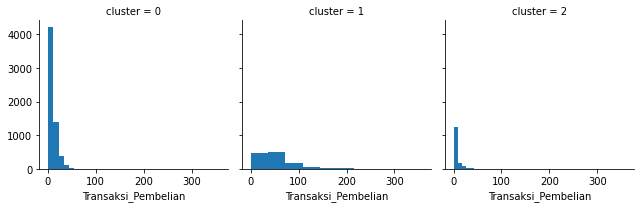

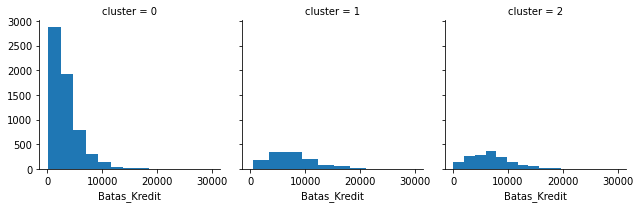

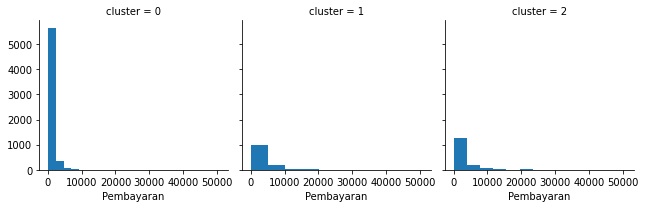

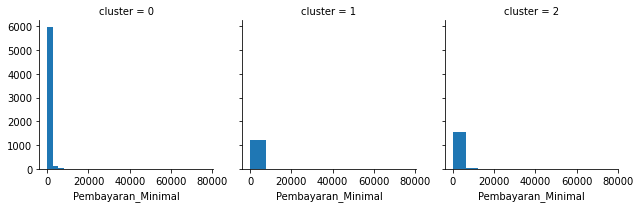

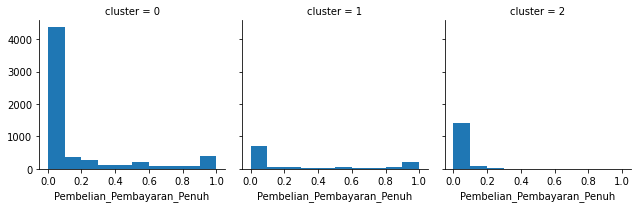

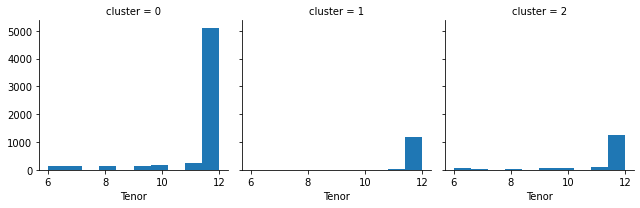

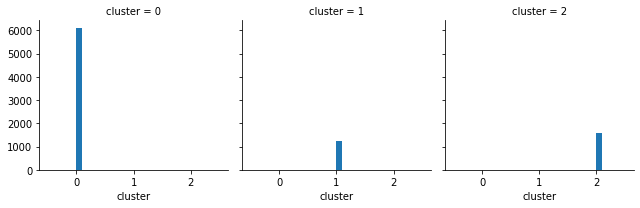

In [36]:
# Visualisasi varibale data berdasarkan cluster
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [46]:
# Statistika deskriptif
clusters.groupby('cluster').describe()

Saldo                                       ... Tenor                  
          count         mean          std        min  ...   25%   50%   75%   max
cluster                                               ...                        
0        6119.0   799.702576   956.215554   0.000000  ...  12.0  12.0  12.0  12.0
1        1235.0  2220.003291  2578.113212  12.423203  ...  12.0  12.0  12.0  12.0
2        1596.0  3989.326804  2683.297946   4.382924  ...  12.0  12.0  12.0  12.0

[3 rows x 136 columns]

In [33]:
# Melihat data mean berdasarkan cluster
clusters.groupby('cluster').mean()

,Saldo,Frekuensi_Saldo,Pembelian,Pembelian_Satu_Kali,Pembelian_Angsuran,Uang_Dibayar_Dimuka,Frekuensi_Pembelian,Frekuensi_Pembelian_Satu_Kali,Frekuensi_Pembelian_Angsuran,Frekuensi_Uang_Dibayar_Dimuka,Transaksi_Uang_Dibayar_Dimuka,Transaksi_Pembelian,Batas_Kredit,Pembayaran,Pembayaran_Minimal,Pembelian_Pembayaran_Penuh,Tenor
cluster,,,,,,,,,,,,,,,,,
0,799.702576,0.835188,505.532394,253.120131,252.733061,329.866776,0.465072,0.132333,0.345145,0.068316,1.211636,8.653865,3269.793689,909.729614,548.515830,0.155750,11.478836
1,2220.003291,0.981477,4268.520980,2717.828543,1551.178267,458.421147,0.949093,0.668166,0.744584,0.063014,1.528745,56.472065,7733.967611,4151.276172,1224.537082,0.298632,11.923077
2,3989.326804,0.957980,384.528277,248.718133,135.887632,3869.856855,0.232290,0.110942,0.144242,0.447176,12.390351,5.612155,6682.960242,3018.907202,1795.684365,0.033774,11.350877


In [37]:
# Visualisasi kebiasaaan cluster
def kde_plot(clusters,x):
    LABEL_COLOR_MAP = {0 : 'y',
                   1 : 'g',
                   2 : 'm',
                   }
    sns.kdeplot(data=clusters, x=x, hue="cluster", palette=LABEL_COLOR_MAP)

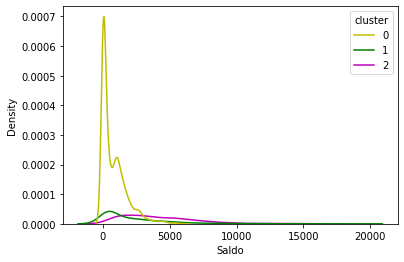

In [38]:
 # Saldo berdasarkan cluster
 kde_plot(clusters, 'Saldo')

1. Cluster 0 saldo RENDAH
2. Cluster 1 saldo TINGGI
3. Cluster 2 saldo TINGGI

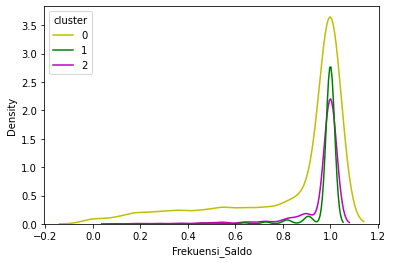

In [39]:
# Frekuensi Saldo berdasarkan cluster
kde_plot(clusters, 'Frekuensi_Saldo')

semua cluster memiliki kebiasaan perilaku update saldo yang tinggi.

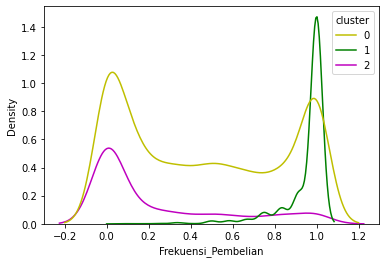

In [41]:
kde_plot(clusters, 'Frekuensi_Pembelian')

1. cluster pembelian RENDAH
2. cluster 1 pembelian TINGGI
3. cluster 2 pembelian SANGAT RENDAH

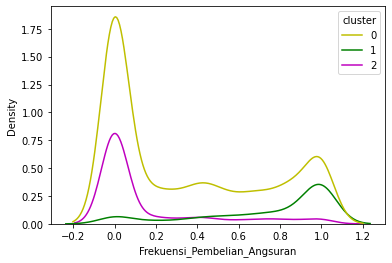

In [40]:
# Frekuensi Saldo berdasarkan Frekuensi_Pembelian_Angsuran
kde_plot(clusters, 'Frekuensi_Pembelian_Angsuran')

1. Cluster 0 frekuensi pembelian angsuran TINGGI
2. Cluster 1 frekuensi pembelian angsuran TINGGI
3. Cluster 2 frekuensi pembelian angsuran RENDAH

cluster 0 memiliki kecenderungan untuk membeli secara angsuran lebih besar dibanding cluster yang lain. Cluster 0 memiliki kebiasaan buy first and pay later.

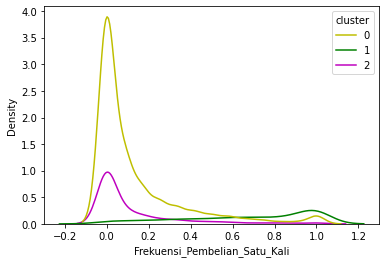

In [42]:
# Frekuensi Saldo berdasarkan Frekuensi_Pembelian_Satu_Kali
kde_plot(clusters, 'Frekuensi_Pembelian_Satu_Kali')

1. Cluster 0 Frekuensi_Pembelian_Satu_Kali RENDAH
2. Cluster 1 Frekuensi_Pembelian_Satu_Kali TINGGI
3. Cluster 2 Frekuensi_Pembelian_Satu_Kali SANGAT RENDAH

cluster 1 memiliki kebiasaan untuk melakukan pembelian satu kali, pembelian langsung dalam sekali jalan(cash), tanpa angsuran paling tinggi.

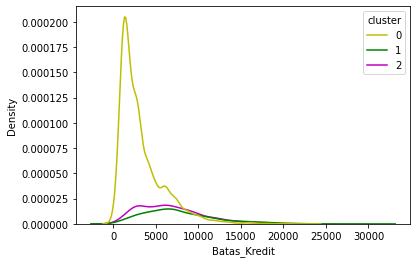

In [43]:
kde_plot(clusters, 'Batas_Kredit')

1. Cluster 0 batas kredit RENDAH
2. Cluster 1 batas kredit TINGGI
3. Cluster 2 batas kredit TINGGI

In [44]:
# Dataframe untuk visualisasi data PCA dengan clustering
df_cluster = pd.concat([X_principal, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head(10)

,PCA 1,PCA 2,cluster
0,-0.489826,-0.679678,0
1,-0.518791,0.545011,2
2,0.330885,0.268977,0
3,-0.482374,-0.092116,0
4,-0.563289,-0.481914,0
5,0.335486,-0.233022,0
6,0.756457,0.388400,1
7,0.576491,-0.261595,0
8,-0.184821,-0.254058,0
9,-0.217279,-0.125095,0


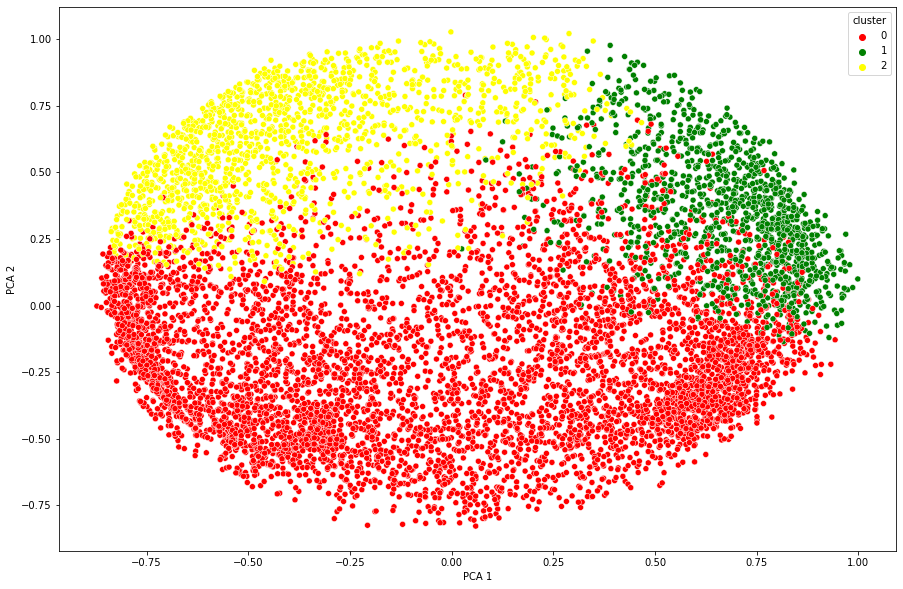

In [45]:
# Visualisasi data clustering
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="PCA 1", y="PCA 2", hue="cluster", data=df_cluster,palette=['red','green','yellow'])
plt.show()

### KESIMPULAN/SARAN

Berdasarkan segmentasi tersebut, dapat diremokendasikan kartu credit untuk masing-masing cluster:


1. **Cluster 0 =** **Credit Card Silver** : Kartu kredit yang paling banyak dimiliki. Kartu kredit untuk pendaftar baru. Kartu kredit yang memiliki batas limit paling rendah. Kartu kredit ini cocok untuk pengguna yang memiliki penghasilan per bulan tidak terlalu tinggi. Pengguna kartu kredit silver tidak terlalu sering melakukan pembelian, namun dapat dijadikan target untuk promo buy first and pay later, dikarenakan memiliki saldo yang rendah, dan cenderung memiliki kebiasaan pembayaran secara angsuran. 

2.  **Cluster 2 =**  **Credit Card GOLD** :  Pemegang kartu ini memiliki saldo menengah atau penghasilan per bulan yang sedang. Kartu kredit ini memiliki batas limit yang tinggi. Pemegang kartu ini yang paling tidak suka melakukan pembelian. Namun, memiliki pembayaran minimal yang tinggi dan batas kredit yang tinggi. 

3.  **Cluster 1 =** **Credit Card PLATINUM** : 
Kartu kredit dengan level tertinggi. Batas Limit dan saldo yang paling tinggi. Kartu ini biasanya hanya dimiliki oleh segelintir orang, dikarenakan syarat yang harus dipenuhi adalah penghasilan per bulan yang sangat tinggi dan memiliki riwayat kredit yang baik. Pemiliki kartu ini paling sering melakukan pembelian. Frekuensi pembelian, frekuensi pembelian sekali jalan, frekuensi pembelian angsuran yang paling tinggi.
